In [1]:
import numpy as np
import tensorflow as tf
import cv2

import matplotlib.pyplot as plt
import os
import scipy.io

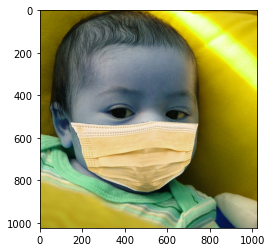

In [2]:
img_array = cv2.imread("/Users/ismail/Documents/Study/LfD/TL project/Mask/00000_Mask.jpg")
plt.imshow(img_array)

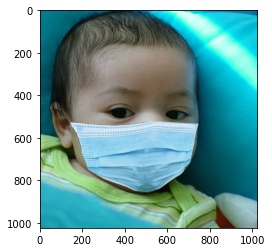

In [3]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [4]:
img_array.shape

(1024, 1024, 3)

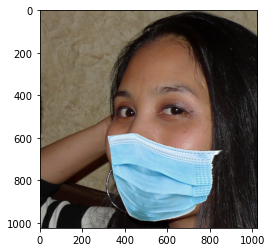

In [5]:
Datadirectory = "/Users/ismail/Documents/Study/LfD/TL project/"
Classes = ["Mask","without_mask"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

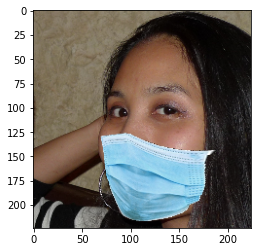

In [6]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
training_Data = []
def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()

In [9]:
print(len(training_Data))

1950


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(1950, 224, 224, 3)

In [13]:
X = X/255.0

In [14]:
y[1000]

1

In [15]:
Y = np.array(y)

In [16]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
    
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [26]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [27]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [28]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

Train on 1755 samples, validate on 195 samples
1755/1755 [==============================] - 140s 80ms/sample - loss: 0.0220 - accuracy: 0.9880 - val_loss: 8.0281e-04 - val_accuracy: 1.0000


In [29]:
new_model.save('/Users/ismail/Documents/Study/LfD/TL project/my_model3.h5')

In [30]:
new_model = tf.keras.models.load_model('/Users/ismail/Documents/Study/LfD/TL project/my_model3.h5')

In [31]:
frame = cv2.imread('/Users/ismail/Documents/Study/LfD/TL project/beauty.jpg')

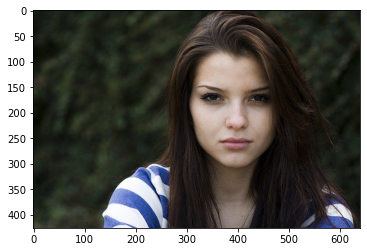

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [33]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/225.0

In [34]:
Predictions = new_model.predict(final_image)
Predictions

array([[1.]], dtype=float32)

In [35]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [36]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(426, 640)

In [37]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

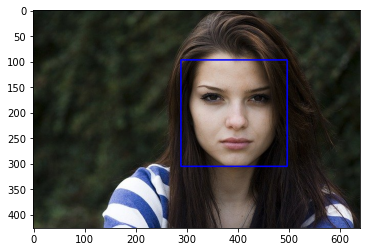

In [38]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

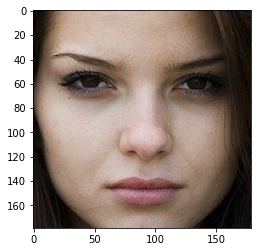

In [39]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [40]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/225.0
Predictions = new_model.predict(final_image)
Predictions

array([[0.9999496]], dtype=float32)

In [41]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255,255,255)

img = np.zeros((500,500))
text = "some text in here"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0],box_coords[1],rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0,0,0), thickness=1)


cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    result = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    
    if(result > 0.5):
        status = "NO Mask Detected"
        
        x1,y1,w1,h1 = 0,0,270,100
        
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        #cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    else:
        status = "Face Mask Detected"
        x1,y1,w1,h1 = 0,0,270,100
        
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        #cv2.putText(frame, status, (100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
    cv2.imshow('TL example', frame)
        
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#plt.show()
#cap.release()


Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d